# Fake News Detection

## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [23]:
df_fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/13772405e466cd4ccc2b2318d0bab8e3744e3b42/data/Fake.csv")
df_true = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/13772405e466cd4ccc2b2318d0bab8e3744e3b42/data/True.csv")

In [ ]:
#df_fake.head()

In [24]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [25]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [26]:
df_fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [27]:
df_true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

Dropping the date from the dataset, The date of a news does not affect its validity in anyway so it is not required. The subject is also not necessary as it does not influence the accuracy of the classifier, so we drop it as well.

In [ ]:
#df_fake.drop(['date', 'subject'], axis=1, inplace=True)
#df_true.drop(['date', 'subject'], axis=1, inplace=True)

In [ ]:
#df_true.head(5)

## Inserting a column "class" as target feature

In [28]:
df_fake["class"] = 0
df_true["class"] = 1

Text(0.5, 0, 'News Type')

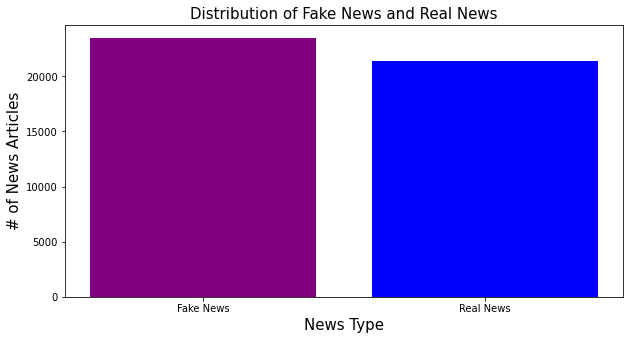

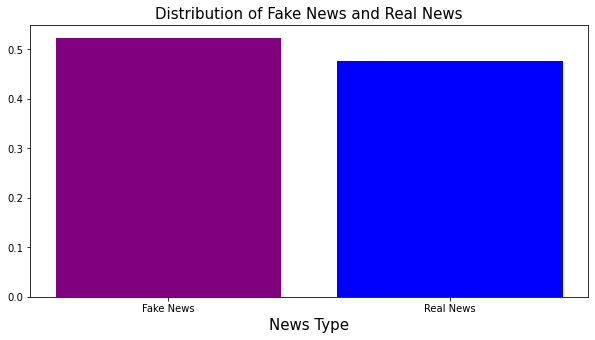

In [29]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_fake), color='purple')
plt.bar('Real News', len(df_true), color='blue')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)


total_len = len(df_fake) + len(df_true)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_fake) / total_len, color='purple')
plt.bar('Real News', len(df_true) / total_len, color='blue')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)

In [30]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [31]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [32]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [33]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/var/folders/q0/zdh248jd29bbpph_m1y49vpw0000gn/T/ipykernel_39772/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/var/folders/q0/zdh248jd29bbpph_m1y49vpw0000gn/T/ipykernel_39772/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
#df_fake_manual_testing.head(10)

In [ ]:
#df_true_manual_testing.head(10)

In [34]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("endsarstestmodel.csv")

## Merging True and Fake Dataframes

In [35]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [36]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [37]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [38]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Random Shuffling the dataframe

In [39]:
df = df.sample(frac = 1)

In [40]:
df.head()

,text,class
20373,TOKYO (Reuters) - Japanese Prime Minister Shin...,1
10353,"KANSAS CITY, Mo./BLOOMINGTON, Ill. (Reuters) -...",1
4466,WASHINGTON (Reuters) - A U.S. House of Represe...,1
8478,"On Tuesday, Trump announced that he would be s...",0
15071,Kids should be learning the benefits of capita...,0


In [41]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [42]:
df.columns

Index(['text', 'class'], dtype='object')

In [43]:
df.head()

,text,class
0,TOKYO (Reuters) - Japanese Prime Minister Shin...,1
1,"KANSAS CITY, Mo./BLOOMINGTON, Ill. (Reuters) -...",1
2,WASHINGTON (Reuters) - A U.S. House of Represe...,1
3,"On Tuesday, Trump announced that he would be s...",0
4,Kids should be learning the benefits of capita...,0


## Creating a function to process the texts

In [44]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [45]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [46]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [50]:
pred_lr=LR.predict(xv_test)

In [51]:
LR.score(xv_test, y_test)

0.9854723707664884

In [52]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5931
           1       0.98      0.99      0.98      5289

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [53]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [54]:
pred_dt = DT.predict(xv_test)

In [55]:
DT.score(xv_test, y_test)

0.9953654188948307

In [56]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5931
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [58]:
pred_gbc = GBC.predict(xv_test)

In [59]:
GBC.score(xv_test, y_test)

0.9943850267379679

In [60]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5931
           1       0.99      1.00      0.99      5289

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [62]:
pred_rfc = RFC.predict(xv_test)

In [63]:
RFC.score(xv_test, y_test)

0.9879679144385026

In [64]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5931
           1       0.99      0.99      0.99      5289

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [65]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [66]:
news = str(input())
manual_testing(news)

Jordan Peterson is dead


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [67]:
news = str(input())
manual_testing(news)

Matthew Hans-Bello just bought a car for his mother and father in his sister's wedding


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [68]:
news = str(input())
manual_testing(news)

ASAP Rocky cheated on Rihanna


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
news = str(input())
manual_testing(news)